# Gradients and Multivariable Calculus | التدرجات والتفاضل المتعدد

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course ??, Unit ??** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# Gradients and Multivariable Calculus | التدرجات والتفاضل المتعدد

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 1: Derivatives** - Understand single-variable derivatives
- ✅ **Module 01: Linear Algebra** - Understand vectors
- ✅ **Basic understanding**: What are partial derivatives?

**If you haven't completed these**, you might struggle with:
- Understanding gradient vectors
- Understanding partial derivatives
- Using gradients for optimization

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the SECOND example of Module 02** - extends derivatives to multiple variables!

**Why this example SECOND?**
- **Before** you can understand gradients, you need derivatives (Example 1)
- **Before** you can do gradient descent, you need gradients (Example 3)
- **Before** you can train ML models, you need to optimize multiple parameters

**Builds on**: Example 1 (derivatives)

**Leads to**: 
- 📓 Example 3: Gradient Descent (uses gradients)
- 📓 Module 03: Optimization (uses gradients for optimization)

---

## The Story: Understanding Before Using | القصة: الفهم قبل الاستخدام

Imagine you're on a mountain and want to find the lowest point. **Before** you can find it, you need to know which direction is downhill in both north-south AND east-west directions. **After** understanding gradients, you know the direction of steepest descent in all dimensions!

Same with machine learning: **Before** training models, we need to adjust many parameters. **After** understanding gradients, we can optimize all parameters simultaneously!

---

## Why This Concept Matters | لماذا يهم هذا المفهوم؟

### Why Gradients Matter in ML

**WHY** are gradients essential for machine learning?

1. **Multiple Parameters**:
   - **WHY**: ML models have many parameters (weights, biases)
   - **HOW**: Gradient = vector of partial derivatives for each parameter
   - **AFTER**: Can optimize all parameters at once

2. **Direction of Steepest Descent**:
   - **WHY**: Need to know best direction to minimize loss
   - **HOW**: Gradient points in direction of steepest increase, negative gradient = steepest decrease
   - **AFTER**: Most efficient optimization direction

3. **Neural Network Training**:
   - **WHY**: Each layer has many parameters
   - **HOW**: Compute gradient for each parameter
   - **AFTER**: Enables training of complex models

## Learning Objectives | أهداف التعلم
1. Understand what gradients represent
2. Compute gradients for multivariable functions
3. Understand partial derivatives
4. Visualize gradients
5. See how gradients guide optimization
6. Apply to real ML scenarios

---

## Step 1: Import necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---

## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We understand single-variable derivatives but ML models have many parameters.

**AFTER**: We'll understand gradients that handle multiple variables simultaneously!

**Why this matters**: ML models optimize many parameters at once - gradients make this possible!

## Step 2: Understanding Gradients | الخطوة 2: فهم التدرجات

**BEFORE**: We have a function of multiple variables but don't know how to optimize it.

**AFTER**: We'll compute gradients that tell us how to adjust each parameter!

**Why gradients?** They give us a direction vector - one component for each parameter!

In [2]:
# Example 1: Computing Gradients
# WHY: ML models have many parameters - need direction for each
# HOW: Gradient = vector of partial derivatives

def multivariable_function(x, y):
    """A function of two variables: f(x, y) = x² + y² + xy"""
    return x**2 + y**2 + x*y

def partial_x(x, y):
    """Partial derivative w.r.t. x: ∂f/∂x = 2x + y"""
    return 2*x + y

def partial_y(x, y):
    """Partial derivative w.r.t. y: ∂f/∂y = 2y + x"""
    return 2*y + x

def gradient(x, y):
    """Gradient vector = [∂f/∂x, ∂f/∂y]"""
    return np.array([partial_x(x, y), partial_y(x, y)])

# Evaluate at a point
x_val, y_val = 1.0, 2.0
grad = gradient(x_val, y_val)

print("Example 1: Computing Gradients")
print("=" * 60)
print(f"Function: f(x, y) = x² + y² + xy")
print(f"At point ({x_val}, {y_val}):")
print(f"  - Function value: {multivariable_function(x_val, y_val):.2f}")
print(f"  - Gradient vector: {grad}")
print(f"  - ∂f/∂x = {partial_x(x_val, y_val):.2f} (change w.r.t. x)")
print(f"  - ∂f/∂y = {partial_y(x_val, y_val):.2f} (change w.r.t. y)")
print(f"\n💡 WHY: Gradient points in direction of steepest increase")
print(f"💡 HOW: Each element = how f changes w.r.t. that parameter")
print(f"💡 AFTER: Negative gradient = direction of steepest decrease (what we want!)")

Example 1: Computing Gradients
Function: f(x, y) = x² + y² + xy
At point (1.0, 2.0):
  - Function value: 7.00
  - Gradient vector: [4. 5.]
  - ∂f/∂x = 4.00 (change w.r.t. x)
  - ∂f/∂y = 5.00 (change w.r.t. y)

💡 WHY: Gradient points in direction of steepest increase
💡 HOW: Each element = how f changes w.r.t. that parameter
💡 AFTER: Negative gradient = direction of steepest decrease (what we want!)


## Step 3: Using Gradients for Optimization | الخطوة 3: استخدام التدرجات للتحسين

**BEFORE**: We computed gradients but don't see how they optimize.

**AFTER**: We'll see how negative gradients point toward the minimum!

**Why this matters?** This is exactly how gradient descent works - move opposite to gradient!

In [3]:
# Example 2: Gradient Direction for Optimization
# WHY: We want to minimize the function
# HOW: Move in direction opposite to gradient

# At point (1, 2), gradient is [4, 5]
# This means: increase x by 4, increase y by 5 → function increases most
# To minimize: decrease x by 4, decrease y by 5 → function decreases most

current_point = np.array([1.0, 2.0])
current_grad = gradient(current_point[0], current_point[1])
step_direction = -current_grad  # Negative gradient = direction to minimize

print("\nExample 2: Using Gradients for Optimization")
print("=" * 60)
print(f"Current point: ({current_point[0]}, {current_point[1]})")
print(f"Current gradient: {current_grad}")
print(f"Step direction (negative gradient): {step_direction}")
print(f"\n💡 WHY: Negative gradient points toward minimum")
print(f"💡 HOW: Move in direction opposite to gradient")
print(f"💡 AFTER: This is the core of gradient descent!")


Example 2: Using Gradients for Optimization
Current point: (1.0, 2.0)
Current gradient: [4. 5.]
Step direction (negative gradient): [-4. -5.]

💡 WHY: Negative gradient points toward minimum
💡 HOW: Move in direction opposite to gradient
💡 AFTER: This is the core of gradient descent!


---

## 📊 Visualization | التصور


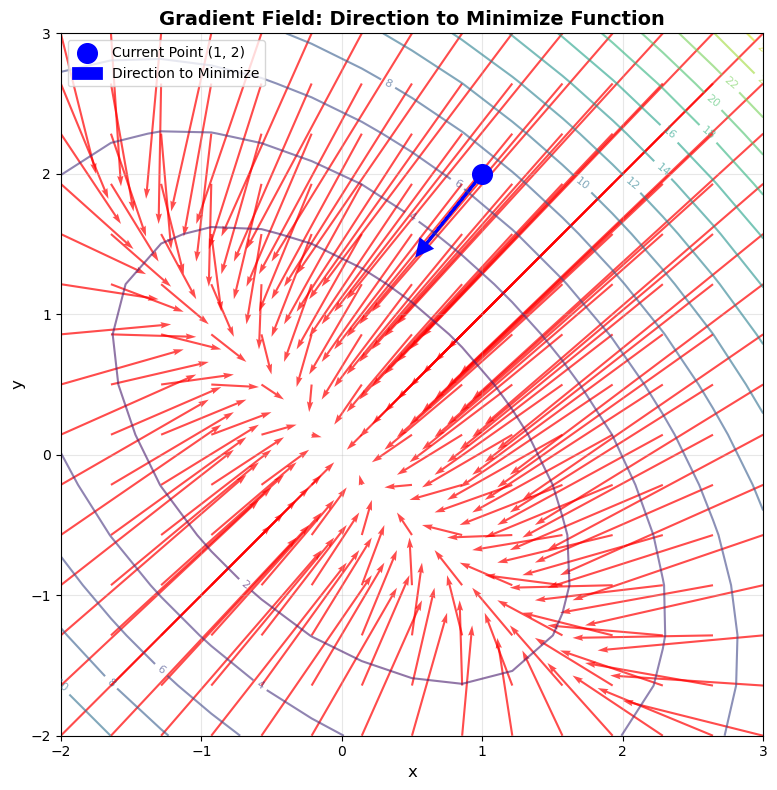


📊 Visualization:
  - Contour lines show function values
  - Red arrows show negative gradient direction (toward minimum)
  - Blue arrow shows direction from current point
  - This is HOW gradients guide optimization!


In [4]:
# Visualize gradient field
x_range = np.linspace(-2, 3, 15)
y_range = np.linspace(-2, 3, 15)
X, Y = np.meshgrid(x_range, y_range)
Z = multivariable_function(X, Y)

# Compute gradients at grid points
U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(len(x_range)):
    for j in range(len(y_range)):
        grad = gradient(X[j, i], Y[j, i])
        U[j, i] = -grad[0]  # Negative gradient (direction to minimize)
        V[j, i] = -grad[1]

fig, ax = plt.subplots(figsize=(10, 8))

# Contour plot of function
contour = ax.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Gradient field (negative gradients point toward minimum)
ax.quiver(X, Y, U, V, scale=20, alpha=0.7, color='red', width=0.003)

# Mark the point we analyzed
ax.scatter([1.0], [2.0], color='blue', s=200, zorder=5, label='Current Point (1, 2)')
ax.arrow(1.0, 2.0, -current_grad[0]*0.1, -current_grad[1]*0.1, 
         head_width=0.1, head_length=0.1, fc='blue', ec='blue', linewidth=2, 
         label='Direction to Minimize')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Gradient Field: Direction to Minimize Function', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\n📊 Visualization:")
print("  - Contour lines show function values")
print("  - Red arrows show negative gradient direction (toward minimum)")
print("  - Blue arrow shows direction from current point")
print("  - This is HOW gradients guide optimization!")

---

## Part 3: AFTER - Results and Implications | الجزء الثالث: بعد - النتائج والآثار

### What This Enables

**AFTER** understanding gradients:

1. **Multi-Parameter Optimization**: Can optimize all parameters simultaneously
2. **Neural Networks**: Ready to understand backpropagation
3. **Efficient Training**: Can train complex models with many parameters
4. **Next Steps**: Learn gradient descent (Example 3) to actually use gradients

---

## 🎯 Summary: What We Learned | الملخص: ما تعلمناه

**BEFORE this notebook**: We didn't understand how to optimize multiple parameters.

**AFTER this notebook**: We can:
- ✅ Understand WHY gradients matter for ML
- ✅ Compute HOW gradients work for multiple variables
- ✅ See what happens AFTER (optimization direction)

**Next Steps**: 
- 📓 Example 3: Gradient Descent (use gradients to optimize)

---

## ✅ Example Complete! | اكتمل المثال!
